In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo ngẫu nhiên
np.random.seed(42)

mean1 = [2, 2]
mean2 = [8, 3]
mean3 = [3, 6]
cov = [[1, 0], [0, 1]]  # ma trận hiệp phương sai đơn vị (identity)

# Tạo 3 cụm
data1 = np.random.multivariate_normal(mean1, cov, 200)
data2 = np.random.multivariate_normal(mean2, cov, 200)
data3 = np.random.multivariate_normal(mean3, cov, 200)

# Gộp lại thành 1 tập dữ liệu
data = np.vstack((data1, data2, data3))

In [ ]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k=3, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        
        if np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return centroids, labels

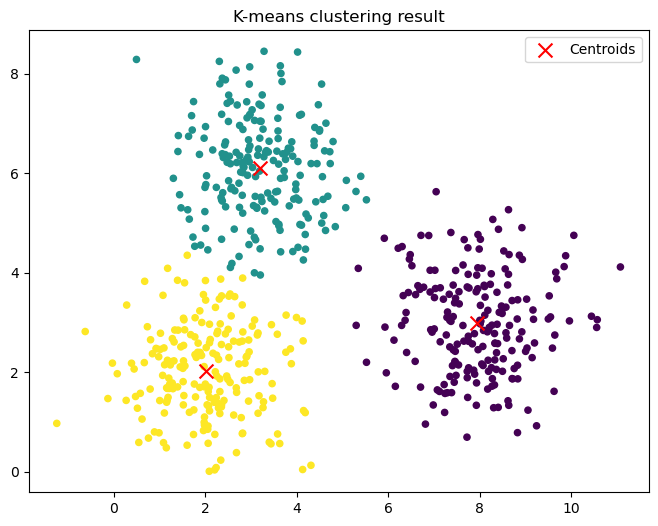

In [ ]:
centroids, labels = kmeans(data, k=3)

plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-means clustering result")
plt.legend()
plt.show()

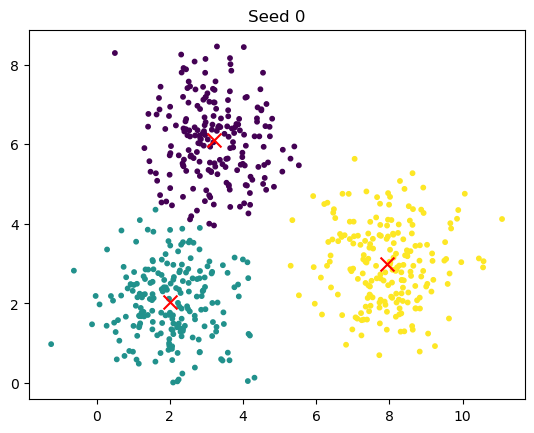

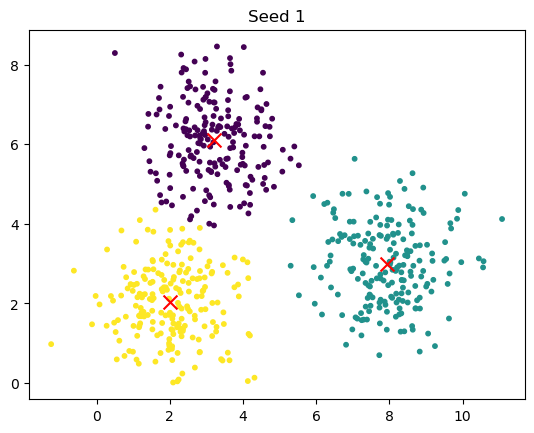

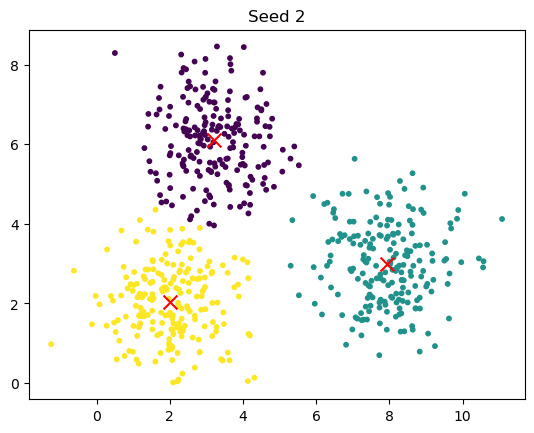

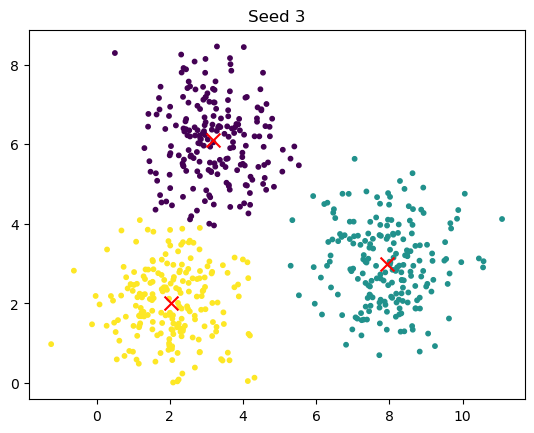

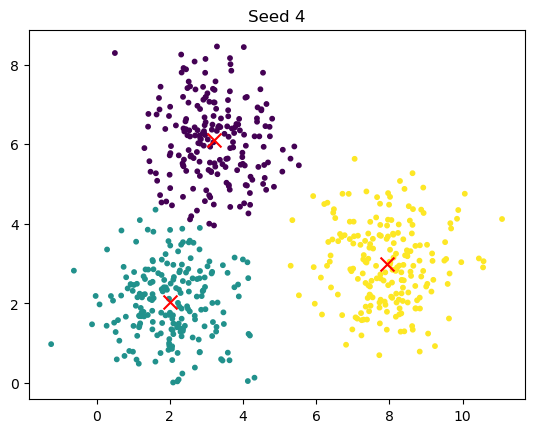

In [8]:
for seed in [0, 1, 2, 3, 4]:
    np.random.seed(seed)
    centroids, labels = kmeans(data, k=3)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
    plt.title(f"Seed {seed}")
    plt.show()